

<h1><center>Trabajo Práctico de simulación 1</center></h1>
<hr width=50%>
<h1><center>Repetidor Analógico vs Repetidor Digital</center></h1>

|          Nombre         | Padrón |    Correo electrónico    |
|:-----------------------:|:------:|:------------------------:|
| Facundo Agustín Demarco | 100620 |    fdemarco@fi.uba.ar    |
|      Leonel Mendoza     | 101153 |    lmendoza@fi.uba.ar    |
|     Francisco Rossi     |  99540 |     frrossi@fi.uba.ar    |

***

[0.4358178914637945, 0.4781765232061604, 0.4924576557989749, 0.4975039836718865, 0.4991391234380618, 0.4997186712413261]


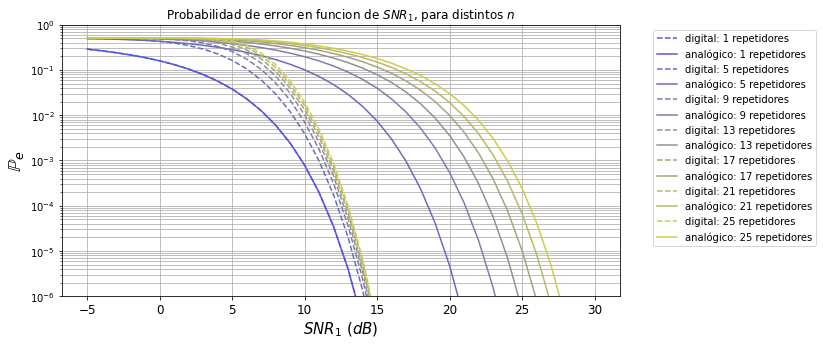

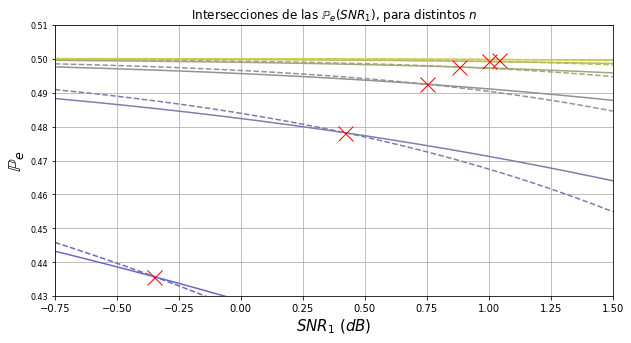

In [1]:
### EJERCICIO 3

# importamos algunas bibliotecas
import numpy as np
import scipy as sc
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import scale

# definimos la función Q (supervivencia de una normal estandar.)
qfunc = lambda x : sc.stats.norm.sf(x) # defino la función qfunc

P_e_d = lambda n, SNR_lin: 1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) # Probabilidad de error (digital)
P_e = lambda n,SNR_lin: qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1))) # Probabilidad de error (analogico)
Resta = lambda n, SNR_lin:1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) - qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1)))
SNR = np.arange(-5,30 + 1) # vector de SNRs en dB
SNR_lin = 10 ** (SNR/10) # vector de SNRs

vector_legend = [] # vector auxiliar


#inicio plot gráfico ej3.1
fig1=plt.figure(figsize=(10,5))

for n in range(1,25+4,4):
    plt.semilogy(SNR,P_e_d(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle='--')
    vector_legend.append('digital: %d repetidores'%n)
    plt.semilogy(SNR,P_e(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))
    vector_legend.append('analógico: %d repetidores'%n)

plt.ylim(10e-7,1)
plt.grid(True, which="both", ls="-")
plt.title(r'Probabilidad de error en funcion de $SNR_1$, para distintos $n$', fontsize=12)
plt.xlabel(r'$SNR_1~(dB)$', fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(vector_legend, bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 10})

#fin plot gráfico ej3.1

#inicio plot gráfico ej3.2
SNR_zoom_dB = np.linspace(-0.75, 1.5, 150)
SNR_zoom = 10 ** (SNR_zoom_dB/10)

plt.figure(figsize=(10,5))
for n in range(1,25+4,4):
    plt.plot(SNR_zoom_dB,P_e_d(n,SNR_zoom), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle= '--')
    plt.plot(SNR_zoom_dB,P_e(n,SNR_zoom), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))

x_intersection=[-0.35,0.42,0.75,0.88,1,1.04]
y_intersection=[P_e(5,10 ** (-0.35/10)), P_e(9,10**(0.42/10)), P_e(13,10 ** (0.75/10)), P_e(17, 10 ** (0.88/10)), P_e(21, 10 ** (1/10)), P_e(25, 10 ** (1.04/10))]
plt.plot(x_intersection, y_intersection, 'xr', markersize=15)
plt.grid(True, which="both", ls="-")
plt.ylim(0.43,0.51)
plt.xlim(-0.75,1.5)
plt.title(r'Intersecciones de las $\mathbb{P}_{e}(SNR_1)$, para distintos $n$')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.xlabel(r'$SNR_1~(dB)$',fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$',fontsize=18);

print(y_intersection)
#fin plot gráfico ej3.2


In [2]:
###  EJERCICIO 4


N = int(1e5) #cantidad de realizaciones
media_ruido = 0
var_ruido = 1
n = 9 # cantidad de repetidores

proba = 0.5 # probabilidad de la bernoulli
SNR1_dB = np.arange(5,25+1,1)
SNR1 = 10 ** (SNR1_dB/10)
h = 0.9 # factor de atenuación
G = (1/h) * np.sqrt(SNR1/(SNR1+1))
A = np.sqrt((var_ruido**2/h**2) *SNR1)

#generación de variables
X=np.zeros((len(SNR1), N))

for i in range(len(SNR1)):
    X[i] = np.array([(np.random.binomial(size=N, n=1, p=proba) - 0.5) * 2 * A[i]])

# esta función representa a un repetidor analógico, recibe una entrada (Y_i) y la amplifica o atenua por la ganancia G_.
## devuelve X_{i+1}
def repetidor_analogico(entrada, ganancia,A):
    return entrada * ganancia

#esta funcion representa a un repetidor digital, tomando la decisión correspondiente recibe una entrada (Y_i) 
## y dependiendo de su signo devuelve A o -A
def repetidor_digital(entrada, ganancia, A):
    salida = np.zeros(len(entrada))
    for i in range(len(entrada)):
        if entrada[i] < 0:
            salida[i] = -A
        else:
            salida[i] = A

    return salida

# representa + Wi, agrega ruido a la señal
def ruido(entrada, media_ruido, var_ruido, N):
    #genero el ruido cada vez que llamo la funcion
    aux = entrada + np.random.normal(loc=media_ruido, scale=var_ruido, size=N)
    return aux

# atenuación de la señal
def atenuacion(entrada,h):
    return entrada * h

#diccionario de repetidores
repe_dicc = {
    'repetidor_analogico': repetidor_analogico,
    'repetidor_digital': repetidor_digital
}

# aplica a entrada el sistema de n repetidores con los parámetros indicados. 
def sistema(entrada,n,media_ruido,var_ruido,N,h, ganancia,tipo,A):
    salida = entrada
    for i in range(n):
        salida = repe_dicc["repetidor_%s"%tipo](ruido(atenuacion(salida, h), media_ruido, var_ruido, N) , ganancia, A)

    salida_pre_receptor = salida
    salida = repetidor_digital(salida,ganancia,A) # receptor
    return salida, salida_pre_receptor

# media muestral de la indicadora
def mean_montecarlo(entrada, salida):
    N_mean = 0
    if len(entrada) != len(salida):
        return 'size_exc'

    N = len(entrada)
    for i in range(N):
        if entrada[i] != salida[i]:
             N_mean += 1
    return N_mean/N

# realización de la simulación
P_e_mc_snr = np.zeros(len(SNR1))
P_e_d_mc_snr = np.zeros(len(SNR1))
for i in range(len(SNR1)):
    salida_analog, salida_analog_pre_receptor = sistema(X[i], n, media_ruido, var_ruido, N, h, G[i], 'analogico',A[i])
    salida_digit, salida_digit_pre_receptor = sistema(X[i], n, media_ruido, var_ruido, N, h, G[i], 'digital', A[i])
    P_e_mc_snr[i] = mean_montecarlo(X[i], salida_analog)
    P_e_d_mc_snr[i] = mean_montecarlo(X[i], salida_digit)

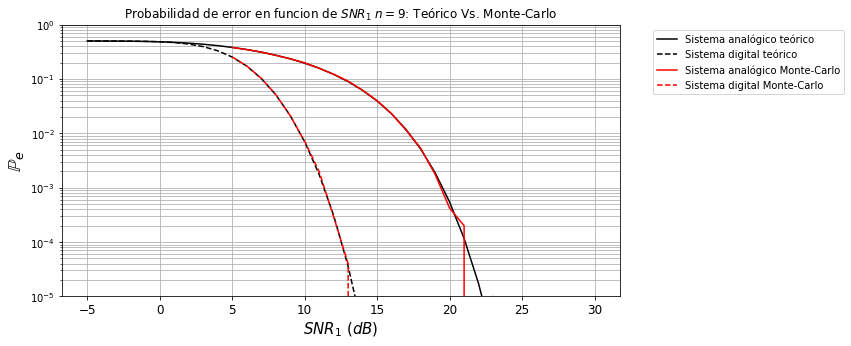

In [3]:
# Monte Carlo Vs curvas teóricas
# configuramos el tamaño de la figura
plt.figure(figsize=(10,5))

# plots de las curvas teóricas
plt.semilogy(SNR,P_e(9,SNR_lin), color='k')
plt.semilogy(SNR,P_e_d(9,SNR_lin), color='k', linestyle= '--')

# plots de las curvas obtenidas mediante monte carlo
plt.semilogy(SNR1_dB, P_e_mc_snr, color='r')
plt.semilogy(SNR1_dB, P_e_d_mc_snr, color='r', linestyle='--')

plt.legend(["Sistema analógico teórico", "Sistema digital teórico", "Sistema analógico Monte-Carlo", "Sistema digital Monte-Carlo"],bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 10})

plt.ylim(10e-6,1)
plt.grid(True, which="both", ls="-")
plt.title(r'Probabilidad de error en funcion de $SNR_1$ $n = 9$: Teórico Vs. Monte-Carlo', fontsize=12)
plt.xlabel(r'$SNR_1~(dB)$', fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10);

In [4]:
# cálculo del error cuadrático medio entre ambas curvas:
SNR_rango = np.arange(5,25+1,1)

ecm_analog = (np.square(P_e_mc_snr - P_e(9,SNR_rango))).mean()
ecm_digit  = (np.square(P_e_d_mc_snr - P_e_d(9,SNR_rango))).mean()
print("El error cuadrático medio en el caso analógico entre la curva teórica y la simulación MC es %.8f" %ecm_analog)
print("El error cuadrático medio en el caso digital entre la curva teórica y la simulación MC es %.8f" %ecm_digit)


El error cuadrático medio en el caso analógico entre la curva teórica y la simulación MC es 0.00506983
El error cuadrático medio en el caso digital entre la curva teórica y la simulación MC es 0.00195564


In [5]:
### EJERCICIO 4.3 Histograma y pdfs

# definición de las constantes correspondientes
h = 0.9
var_ruido = 1
subindice = 8 #valor de de SNR 
A_nuevo = A[subindice]
SNRh = SNR1[subindice]
X_hist = X[subindice]
G_hist = (1/h)*np.sqrt(SNRh/(SNRh+1))
n_h = 9

# valores media y desvio estandar teoricos
mu = A_nuevo*h*np.power(SNRh/(1+SNRh),(n_h-1)/2)
sigma = np.sqrt(var_ruido**2 * (1+SNRh)*(1-np.power(SNRh/(1+SNRh),n_h)))

# definición del eje para las densidades y las funciones densidad
samples = int(1e3)
y = np.linspace(-15,15, samples)
#pdfs
f_Y_A = sc.stats.norm.pdf(y, loc=mu, scale=sigma)
f_Y_m_A= sc.stats.norm.pdf(y, loc=(-mu), scale=sigma)

# se pasa un vector X por el sistema para hacer el histograma
salida_analog, salida_analog_pre_receptor = sistema(X_hist, n_h, media_ruido, var_ruido, N, h, G_hist, 'analogico',A_nuevo)
salida_analog_pre_receptor = ruido(atenuacion(salida_analog_pre_receptor, h), media_ruido, var_ruido, N)

# salidas condicionadas, si la entrada era A o -A
salida_apr_A = []
salida_apr_m_A = []

for i in range(len(salida_analog_pre_receptor)):
    if X_hist[i] < 0:
        salida_apr_m_A.append(salida_analog_pre_receptor[i])
    elif X_hist[i] > 0:
        salida_apr_A.append(salida_analog_pre_receptor[i])

salida_analog_pre_receptor_A = np.array(salida_apr_A)
salida_analo_pre_receptor_m_A = np.array(salida_apr_m_A)


# definición del eje y la interseccion para "colorear" eventos de error
y_eve = np.arange(-15,15,0.1)
f_Y_A_eve = sc.stats.norm.pdf(y_eve, loc=mu, scale=sigma)
f_Y_m_A_eve= sc.stats.norm.pdf(y_eve, loc=(-mu), scale=sigma)

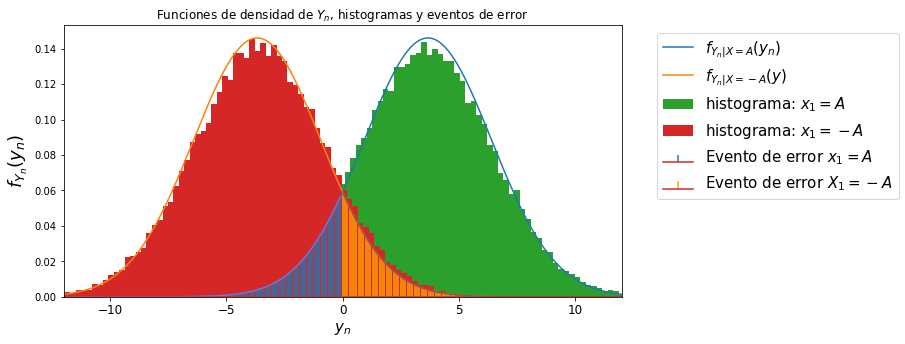

In [6]:
plt.figure(figsize=(10,5))

#plot pdfs
plt.plot(y,f_Y_A)
plt.plot(y,f_Y_m_A)

#plot histogramas
n, binsA, patches = plt.hist(salida_analog_pre_receptor_A,100,density="True")
nm, binsmA, patchesm = plt.hist(salida_analo_pre_receptor_m_A,100,density="True")

# plot eventos de error (si Y_n < 0 dado que X1 = A, hay error; si Y_n >= 0 dado que X1 = -A hay error.)
plt.stem(y_eve[0:150],f_Y_A_eve[0:150], markerfmt="", use_line_collection=True)
plt.stem(y_eve[150:299], f_Y_m_A_eve[150:299], 'orange', markerfmt="", use_line_collection=True)

plt.title(r'Funciones de densidad de $Y_n$, histogramas y eventos de error', fontsize=12)
plt.xlabel(r'$y_n$', fontsize=15)
plt.ylabel(r'$f_{Y_n}(y_n)$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend([r"$f_{Y_n|X=A}(y_n)$",r"$f_{Y_n|X=-A}(y)$",r"histograma: $x_1 = A$",r"histograma: $x_1 = -A$",r"Evento de error $x_1 = A$", r"Evento de error $X_1 = -A$"], bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 15})
plt.xlim(-12,12)

plt.show()

In [7]:
#comparación de parámetros obtenidos.

mu_A = np.mean(salida_apr_A)
mu_m_A = np.mean(salida_apr_m_A)

sigma_A = np.sqrt(np.var(salida_apr_A))
sigma_m_A = np.sqrt(np.var(salida_apr_m_A))

print('    VALORES:')
print('media teorica: ', mu)
print('varianza teorica: ', sigma**2)
print('media hist A: ', mu_A)
print('varianza hist A: ', sigma_A**2)
print('media hist -A: ', mu_m_A)
print('varianza hist -A: ', sigma_m_A**2)

print('    DIFERENCIAS:')
print('Diferencia con mu muesral A ',np.abs(mu - mu_A))
print('Diferencia con mu muestral -A ',np.abs(-mu - mu_m_A))
print('Diferencia con sigma muesral A ',np.abs(sigma - sigma_A))
print('Diferencia con sigma muestral -A ',np.abs(sigma - sigma_m_A))
print('Error relativo mu +A ',100*np.abs(mu - mu_A)/mu,'%')
print('Error relativo mu -A ',100*np.abs(-mu - mu_m_A)/mu,'%')
print('Error relativo sigma +A ',100*np.abs(sigma - sigma_A)/sigma,'%')
print('Error relativo sigma -A ',100*np.abs(sigma - sigma_m_A)/sigma,'%')




    VALORES:
media teorica:  3.6732153654015915
varianza teorica:  7.460112029066453
media hist A:  3.5898082161443683
varianza hist A:  8.171579093194692
media hist -A:  -3.5647426590627225
varianza hist -A:  8.106729927445944
    DIFERENCIAS:
Diferencia con mu muesral A  0.08340714925722326
Diferencia con mu muestral -A  0.10847270633886907
Diferencia con sigma muesral A  0.12727683458381778
Diferencia con sigma muestral -A  0.11591141135172656
Error relativo mu +A  2.2706849710704176 %
Error relativo mu -A  2.953072323517567 %
Error relativo sigma +A  4.659901009513172 %
Error relativo sigma -A  4.243786424593255 %


***
***
## EXTRAS:

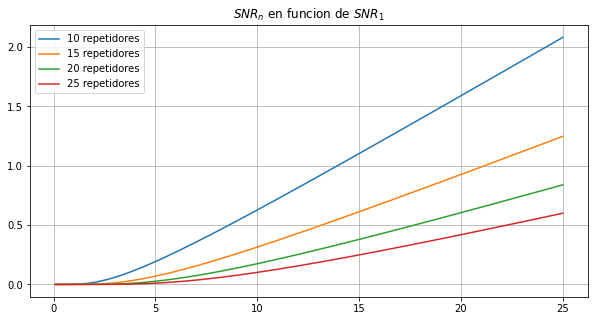

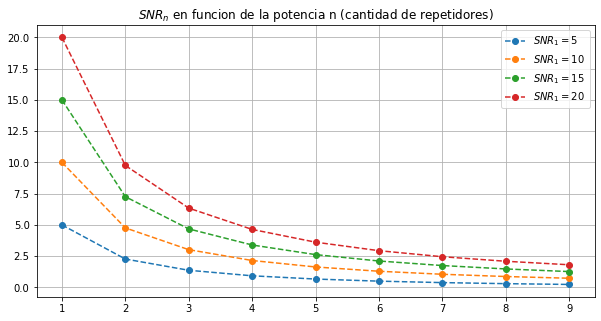

In [12]:
# gráficos del deterioro de SNR en el caso analogico para SNR_1 fijo y n fijos.

step_SNR = 1/1000
cant_repe = 10

n_const = [10, 15, 20, 25]   # cantidad fija de repetidores
SNR_const = [5, 10, 15, 20]  # cantidad fija de SNR_1

SNR_1 = np.arange(0.1,25,step_SNR)
n = np.arange(1,cant_repe,1)

SNR_n_SNR_1 = 1/((1+(1/SNR_1))**(n_const[1])-1)  # particularmente para las constantes 1
SNR_n_n = 1/((1+(1/SNR_const[1]))**(n)-1)

vector_legend = []

plt.figure(figsize=(10,5))

for i in n_const:
    plt.plot(SNR_1, 1/((1+(1/SNR_1))**(i)-1))
    vector_legend.append('%d repetidores'%i)

plt.legend(vector_legend)
plt.title(r'$SNR_{n}$ en funcion de $SNR_{1}$')
plt.grid('minor')

vector_legend = []

plt.figure(figsize=(10,5))
for i in SNR_const:
    plt.plot(n, 1/((1+(1/i))**(n)-1), 'o--')
    vector_legend.append(r'$SNR_1 = %d$ '%i)

plt.legend(vector_legend)

plt.title(r'$SNR_{n}$ en funcion de la potencia n (cantidad de repetidores)')
plt.grid('minor')

Se puede observar como a medida que aumentamos la relación señal a ruido del primer repetidor, la del último también mejora. Y cuantos más repetidores haya, máyor va a ser el deterioro.

<hr>
<h1><center>FIN</center></h1>
<hr>